# Import Required Libraries and Modules
Import the necessary libraries and modules, including the BacteriaVilliCoordinatesGenerator class from generator.py.

In [1]:
# Import BacteriaVilliCoordinatesGenerator class from generator module
from glampy.generator import LammpsRunFileGenerator

# Create class object
Define and initialize the parameters required for the LammpsRunFileGenerator class. Run this until you obtain more or less the same median and maximum for distributions Gt and Rnd.

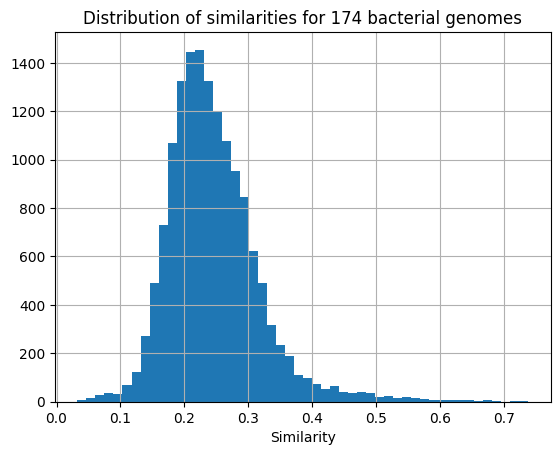

Median: 0.23468614821634
Max: 30.636459070823474


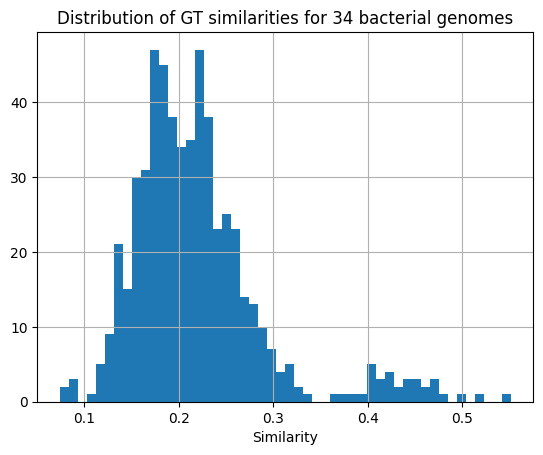

Median: 0.207748637387999
Max: 13.497191735997147


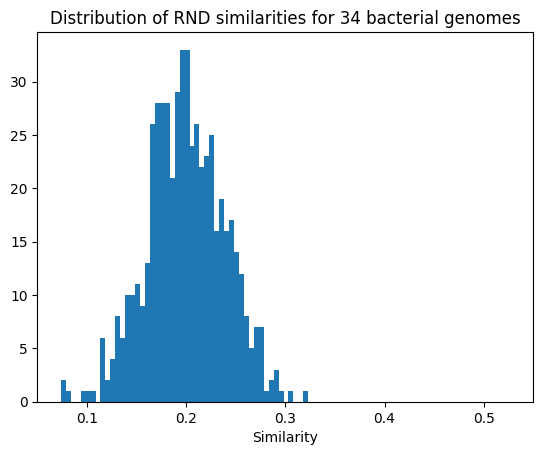

Median: 0.1985182896307131
Max: 13.561566130166838


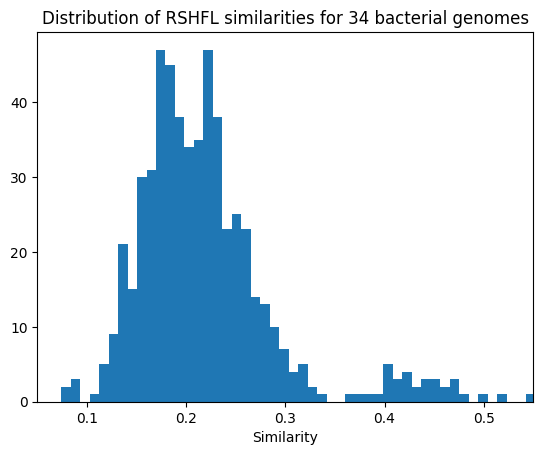

In [2]:
# Define and initialize parameters
params = {
	"input_bac_amount_file_path": "../../data/01_bacteria_amount/bac_amount_518967_mult_435.2017151420611_thresh_10.tsv",
	# input_bac_amount_file_path -- can be any multiplier of the original amount
	"input_func_distances_file_path": "../../data/input_files/genome_functional.distances.txt",
	"output_matrices_dir_path": "../../data/03_matrices/",
	"random_mean": 0.2,
	"random_std": 0.04,
	"plot_figs": True,
    # Add more parameters if needed
}

# Create an instance of BacteriaVilliCoordinatesGenerator
lammps_run_file_generator = LammpsRunFileGenerator(**params)


# Generate pair coefficients

In [3]:
lammps_run_file_generator.generate_pair_coefficients(output_dir_path="../../data/03_pair_coefficients", 
													 generation_type="bacteria", 
													 scaling_factor=10e5)

lammps_run_file_generator.generate_pair_coefficients(output_dir_path="../../data/03_pair_coefficients", 
													 generation_type="both", 
													 scaling_factor=10e5)

# Generate lammps run files

In [4]:
# Bacteria only (gt, rnd, reshuffled)
lammps_run_file_generator.generate_run_files(coordinates_path="../../data/02_coordinates/bacteria_zlimbac_0_10_numbac_518967_bacsize_0.04_bmass_6.4e-05.pos", 
											 output_dir_path="../../data/03_run_experiments", 
											 generation_type="bacteria", 
											 coefficients_type="gt", 
											 processing_units=(10, 10, 1))

lammps_run_file_generator.generate_run_files(coordinates_path="../../data/02_coordinates/bacteria_zlimbac_0_10_numbac_518967_bacsize_0.04_bmass_6.4e-05.pos", 
											 output_dir_path="../../data/03_run_experiments", 
											 generation_type="bacteria", 
											 coefficients_type="rnd", 
											 processing_units=(10, 10, 1))

lammps_run_file_generator.generate_run_files(coordinates_path="../../data/02_coordinates/bacteria_zlimbac_0_10_numbac_518967_bacsize_0.04_bmass_6.4e-05.pos", 
											 output_dir_path="../../data/03_run_experiments", 
											 generation_type="bacteria", 
											 coefficients_type="reshuffled", 
											 processing_units=(10, 10, 1))

# Bacteria and villi (gt, rnd, reshuffled)
lammps_run_file_generator.generate_run_files(coordinates_path="../../data/02_coordinates/both_zlimbac_42.5_45.5_numbac_2491045_bacsize_0.04_bmass_6.4e-05.pos", 
											 output_dir_path="../../data/03_run_experiments", 
											 generation_type="both", 
											 coefficients_type="gt", 
											 processing_units=(10, 10, 1))

lammps_run_file_generator.generate_run_files(coordinates_path="../../data/02_coordinates/both_zlimbac_42.5_45.5_numbac_2491045_bacsize_0.04_bmass_6.4e-05.pos", 
											 output_dir_path="../../data/03_run_experiments", 
											 generation_type="both", 
											 coefficients_type="rnd", 
											 processing_units=(10, 10, 1))

lammps_run_file_generator.generate_run_files(coordinates_path="../../data/02_coordinates/both_zlimbac_42.5_45.5_numbac_2491045_bacsize_0.04_bmass_6.4e-05.pos", 
											 output_dir_path="../../data/03_run_experiments", 
											 generation_type="both", 
											 coefficients_type="reshuffled", 
											 processing_units=(10, 10, 1))

# Generate run scripts for cluster

#### Bacteria, gt

In [5]:
params_cluster = {
	"output_dir_path": "../../data/03_run_experiments",
	"generation_type": "bacteria",
	"coefficients_type": "gt",
	"processing_units": (10, 10, 1),
	"queue": "long",
	"time": "24:00:00",
	"memory": 128,
	"nsteps": 3000000,
	"scaling_factor_for_idbac": 10,
	"scaling_factor_for_vilbac": 10,
	"neigh_modify_size": 55000,
	"page_size": 1000000,
	"bac_veloc": 0.000000004,
	"temp_bac": 0.000000004
}

lammps_run_file_generator.generate_run_script(**params_cluster)

#### Bacteria, rnd

In [6]:
params_cluster = {
	"output_dir_path": "../../data/03_run_experiments",
	"generation_type": "bacteria",
	"coefficients_type": "rnd",
	"processing_units": (10, 10, 1),
	"queue": "long",
	"time": "24:00:00",
	"memory": 128,
	"nsteps": 3000000,
	"scaling_factor_for_idbac": 10,
	"scaling_factor_for_vilbac": 10,
	"neigh_modify_size": 55000,
	"page_size": 1000000,
	"bac_veloc": 0.000000004,
	"temp_bac": 0.000000004
}

lammps_run_file_generator.generate_run_script(**params_cluster)

#### Bacteria, reshuffled

In [7]:
params_cluster = {
	"output_dir_path": "../../data/03_run_experiments",
	"generation_type": "bacteria",
	"coefficients_type": "reshuffled",
	"processing_units": (10, 10, 1),
	"queue": "long",
	"time": "24:00:00",
	"memory": 128,
	"nsteps": 3000000,
	"scaling_factor_for_idbac": 10,
	"scaling_factor_for_vilbac": 10,
	"neigh_modify_size": 55000,
	"page_size": 1000000,
	"bac_veloc": 0.000000004,
	"temp_bac": 0.000000004
}

lammps_run_file_generator.generate_run_script(**params_cluster)

#### Both, gt

In [8]:
params_cluster = {
	"output_dir_path": "../../data/03_run_experiments",
	"generation_type": "both",
	"coefficients_type": "gt",
	"processing_units": (10, 10, 1),
	"queue": "eternal",
	"memory": 128,
	"nsteps": 3000000,
	"scaling_factor_for_idbac": 10,
	"scaling_factor_for_vilbac": 10,
	"neigh_modify_size": 55000,
	"page_size": 1000000,
	"bac_veloc": 0.000000004,
	"temp_bac": 0.000000004
}

lammps_run_file_generator.generate_run_script(**params_cluster)

#### Both, rnd

In [9]:
params_cluster = {
	"output_dir_path": "../../data/03_run_experiments",
	"generation_type": "both",
	"coefficients_type": "rnd",
	"processing_units": (10, 10, 1),
	"queue": "eternal",
	"memory": 128,
	"nsteps": 3000000,
	"scaling_factor_for_idbac": 10,
	"scaling_factor_for_vilbac": 10,
	"neigh_modify_size": 55000,
	"page_size": 1000000,
	"bac_veloc": 0.000000004,
	"temp_bac": 0.000000004
}

lammps_run_file_generator.generate_run_script(**params_cluster)

#### Both, reshuffled

In [10]:
params_cluster = {
	"output_dir_path": "../../data/03_run_experiments",
	"generation_type": "both",
	"coefficients_type": "reshuffled",
	"processing_units": (10, 10, 1),
	"queue": "marathon",
	"time": "07-00:00:00",
	"memory": 128,
	"nsteps": 3000000,
	"scaling_factor_for_idbac": 10,
	"scaling_factor_for_vilbac": 10,
	"neigh_modify_size": 55000,
	"page_size": 1000000,
	"bac_veloc": 0.000000004,
	"temp_bac": 0.000000004
}

lammps_run_file_generator.generate_run_script(**params_cluster)